In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Preparing data for use from CSV

In [2]:
pd.set_option('display.max_rows', None)
                      
relevant_data =  ["followers_count","friends_count", "listedcount", "verified","bot"]                      
data = pd.read_csv('bot_data1.csv')

data = data[relevant_data]

X = data[["followers_count","friends_count", "listedcount", "verified"]]
Y = data[["bot"]]

data.head()

,followers_count,friends_count,listedcount,verified,bot
0,1291,0,10,0,1
1,1,349,0,0,1
2,1086,0,14,0,1
3,33,0,8,0,1
4,11,745,0,0,1


#### Trying with SVM

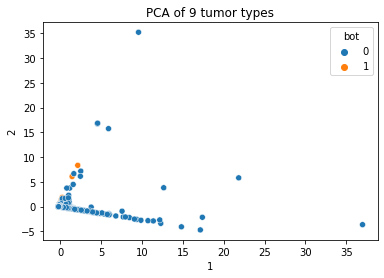

In [3]:
pca = PCA(n_components = 2)
X_pca = pd.DataFrame(data = pca.fit_transform(StandardScaler().fit_transform(X)),columns= ['1','2'])
XY_pca = pd.concat([X_pca,Y], axis=1)
plot = sns.scatterplot(x='1',y='2',data=XY_pca,hue="bot").set_title('PCA of 9 tumor types')

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(StandardScaler().fit_transform(X), Y, test_size=0.2, random_state=0)

model = model = LinearSVC(multi_class = 'ovr', class_weight = 'balanced')
model.fit(X_train,Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 0.66
Accuracy of linear SVC on test set: 0.67


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


##### The accuracy isn't great, as we can see from the PCA graph the data doesn't separate very well naturally so we should try to use another classifier to see if we can do better

#### Trying with decision tree

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((2237, 4), (2237, 1), (560, 4), (560, 1))

In [6]:
model = DecisionTreeClassifier(random_state=0)

cross_val_score(model, X_train, Y_train, cv=5)

array([0.80803571, 0.82366071, 0.82102908, 0.78747204, 0.83892617])

In [7]:
model.fit(X_train, Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.80


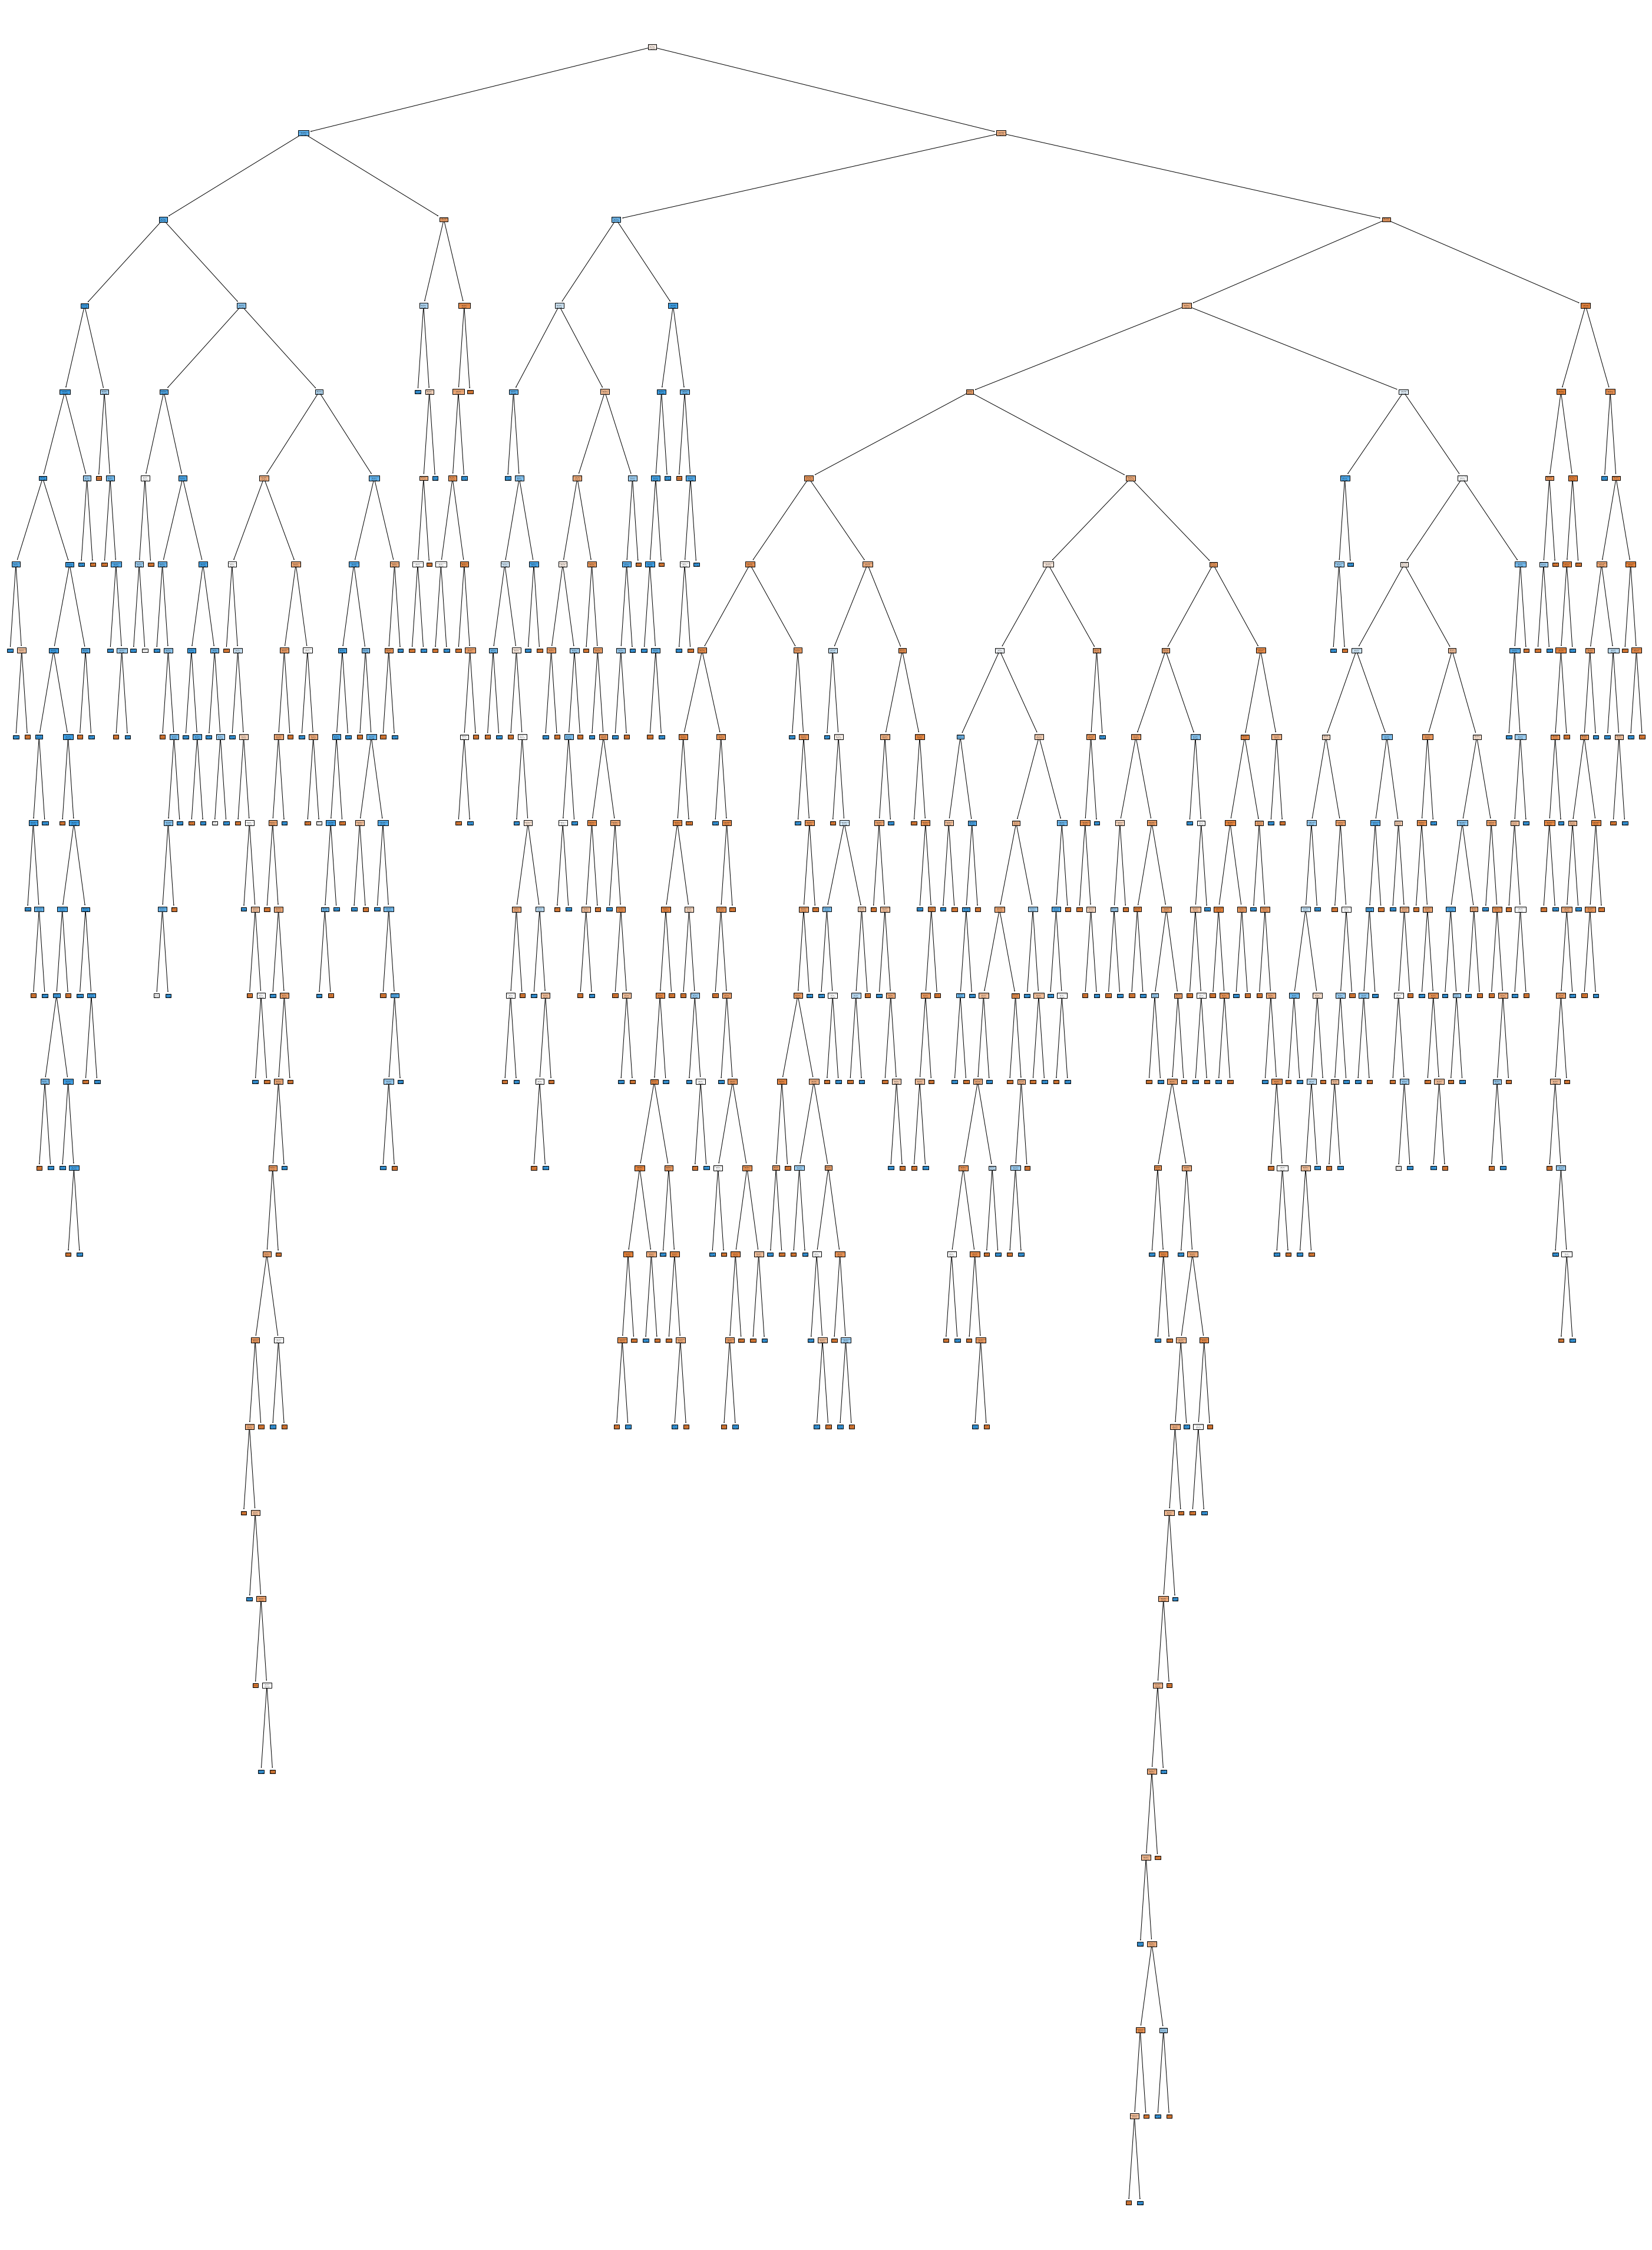

In [8]:
fig = plt.figure(figsize=(50,70))
_ = tree.plot_tree(model, feature_names=relevant_data, class_names=["bot","human"], filled=True)

Confusion matrix, without normalization
[[236  51]
 [ 60 213]]
Normalized confusion matrix
[[0.82 0.18]
 [0.22 0.78]]


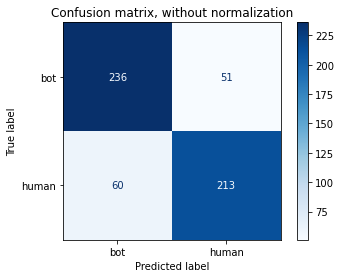

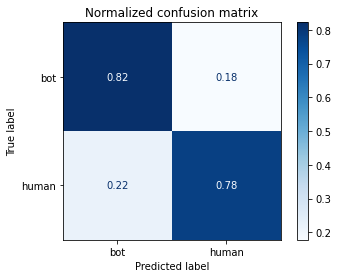

In [9]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=["bot","human"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()